# **Analyzing Iris Flower Data Through PCA-Based Dimensionality Reduction**

- Purpose: This notebook demonstrates Principal Component Analysis (PCA) to reduce the Iris dataset from 4 features to 2 components for visualization and interpretation.
- Dataset: The classic Iris dataset (4 numeric features: sepal length, sepal width, petal length, petal width) with 150 samples across 3 species (Setosa, Versicolor, Virginica).
- What the code does (high level):
  - Loads and inspects the Iris dataset.
  - Standardizes the feature values (important before PCA).
  - Applies PCA to reduce dimensionality for visualization.
  - Plots pairwise features, a 3D scatter, and the 2D PCA embedding to compare class separation.
- Why PCA here: PCA finds the directions (principal components) that explain the most variance. Reducing to 2 components makes it easy to visualize how well different species separate in feature space.

In [1]:
# Import common libraries and plotting tools
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns 
import warnings  # control warnings display
warnings.filterwarnings('ignore')  

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
df_iris = load_iris(as_frame=True).frame
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
X = df_iris.drop('target', axis=1)

In [5]:
X.shape

(150, 4)

In [6]:
# Only plot 2 featues 

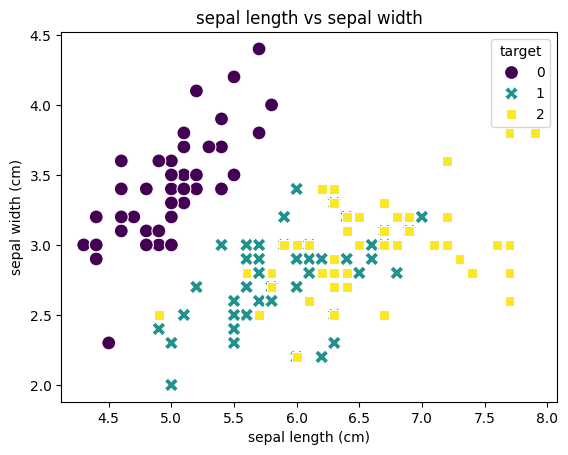

In [7]:
import seaborn as sns
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target',data=df_iris,
               style='target', palette='viridis', s=100)
plt.title("sepal length vs sepal width")
plt.show()

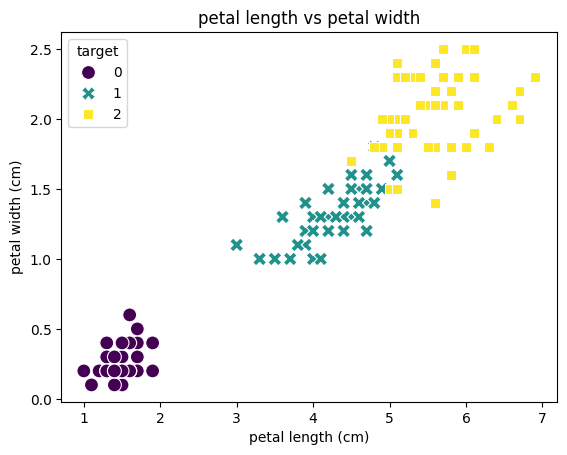

In [8]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='target',data=df_iris,
               style='target', palette='viridis', s=100)
plt.title("petal length vs petal width")
plt.show()

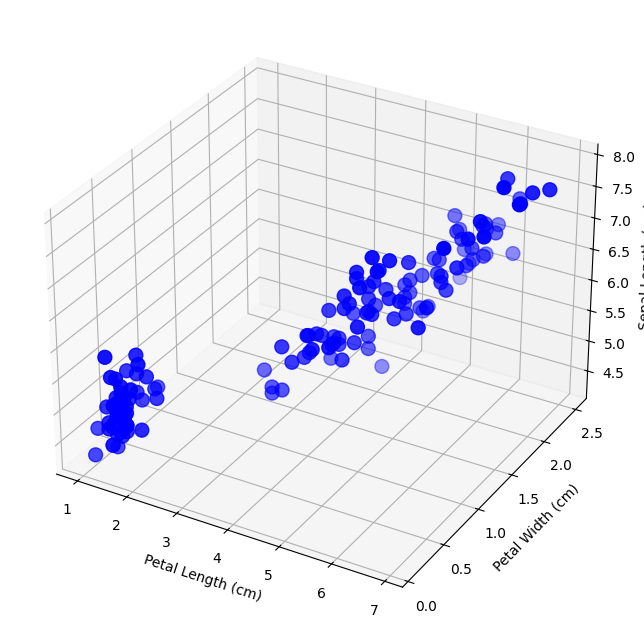

In [9]:
# 3D plot 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Plot 3D scatter
ax.scatter(df_iris['petal length (cm)'], df_iris['petal width (cm)'], df_iris['sepal length (cm)'],
            c='b',s=100)

# Label axes
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.set_zlabel('Sepal Length (cm)')

plt.show()

In [10]:
# For 4D use PCA - linear distribution data

## Stanardize the Data
Standardizing the data is important before applying PCA.

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

import pandas as pd
# Array to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


## Apply PCA 
Now, let's reduce the dimenstionality to 2 components for visualization.

In [12]:
X_scaled.shape

(150, 4)

In [13]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2) # Reduce to 2 dimensions
principal_components = pca.fit_transform(X_scaled)


In [14]:
principal_components.shape

(150, 2)

In [15]:
pca_df = pd.DataFrame(principal_components, columns=['PC 1', 'PC 2'])
pca_df['Species'] = df_iris['target']
pca_df['Species'] = pca_df['Species'].replace({0:'Setosa',1:'Versicolor',2:'Virginica'})
pca_df.sample(5)


,PC 1,PC 2,Species
18,-1.898572,1.405019,Setosa
22,-2.774345,0.458344,Setosa
143,2.040558,0.867521,Virginica
52,1.240979,0.616298,Versicolor
132,1.862703,-0.178549,Virginica


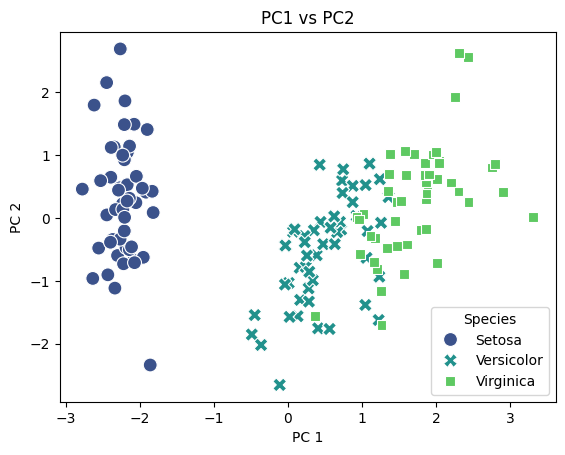

In [16]:
sns.scatterplot(x='PC 1', y='PC 2', hue='Species',data=pca_df,
               style='Species', palette='viridis', s=100)
plt.title("PC1 vs PC2")
plt.show()

## Conclusion

- PCA reduced the original 4-dimensional Iris data to 2 principal components for visualization while preserving the directions of highest variance.
- The 2D PCA scatter shows that Setosa is well-separated from the other species, while Versicolor and Virginica overlap more — this reflects their biological similarity and is expected.
- Standardizing features before PCA is important because it gives each feature equal influence regardless of scale.
- Practical takeaways:
  - Use PCA to get quick visual insight into class separability and to reduce dimensionality before clustering or visualization.
  - If you need better class separation for modeling, consider combining PCA with supervised methods or using feature engineering.

